In [1]:
import cv2
import numpy as np

In [2]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

In [3]:
im = cv2.imread(f'company/oilspill/S__3498035.jpg')

In [4]:
w, h = im.shape[1], im.shape[0]

In [5]:
scale = 0.00392

In [6]:
classes = None
with open(f'yolov3.txt', f'r') as f:
    classes = [line.strip for line in f.readlines()]
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [7]:
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [8]:
net = cv2.dnn.readNet(f'yolov3-tiny.weights', f'yolov3-tiny.cfg')

In [12]:
blob = cv2.dnn.blobFromImage(im, scale, (416, 416), (0,0,0), 1, crop=False)

In [13]:
net.setInput(blob)

In [14]:
outs = net.forward(get_output_layers(net))

In [15]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [16]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * w)
            center_y = int(detection[1] * h)
            _w = int(detection[2] * w)
            _h = int(detection[3] * h)
            x = center_x - _w / 2
            y = center_y - _h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, _w, _h])

In [17]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [18]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [19]:
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(im, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

In [20]:
import matplotlib.pyplot as plt

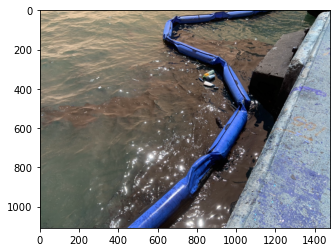

In [21]:
plt.imshow(im)